In [ ]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

In [2]:
import xarray as xr
profile_path = '/data/shared_data/Interp_Profiles/regional/TP/TAO/TAO_WO_2012_ADCP.nc'
ds_adcp = xr.open_dataset(profile_path)
profile_path = '/data/shared_data/Interp_Profiles/regional/TP/TAO/TAO_WO_2012_CUR.nc'
ds_cur = xr.open_dataset(profile_path)
# these are hourly profiles

In [3]:
import pandas as pd
# Combine date and time into a datetime array
dates = ds_adcp['prof_YYYYMMDD'].values.astype(int)
times = ds_adcp['prof_HHMMSS'].values.astype(int)

# Convert to zero-padded strings
date_strs = dates.astype(str)
time_strs = times.astype(str)
time_strs = [t.zfill(6) for t in time_strs]  # ensure time is like 'HHMMSS'
# Combine into full datetime strings and convert to pandas datetime
datetime_strs = [d + t for d, t in zip(date_strs, time_strs)]
datetimes = pd.to_datetime(datetime_strs, format='%Y%m%d%H%M%S')

# Assign as coordinate and optionally swap dimensions
ds_adcp = ds_adcp.assign_coords(time=('iPROF', datetimes))
# ds_adcp = ds_adcp.swap_dims({'iPROF': 'time'})
ds_adcp = ds_adcp.assign_coords(depth=('iDEPTH', ds_adcp['prof_depth'].values*-1))
# ds_adcp = ds_adcp.swap_dims({'iDEPTH': 'depth'})
ds_adcp = ds_adcp.assign_coords(lat=('iPROF', ds_adcp['prof_lat'].values))
ds_adcp = ds_adcp.assign_coords(lon=('iPROF', ds_adcp['prof_lon'].values))
# ds_adcp.set_index(lat='lat', lon='lon')
# Combine date and time into a datetime array
dates = ds_cur['prof_YYYYMMDD'].values.astype(int)
times = ds_cur['prof_HHMMSS'].values.astype(int)

# Convert to zero-padded strings
date_strs = dates.astype(str)
time_strs = times.astype(str)
time_strs = [t.zfill(6) for t in time_strs]  # ensure time is like 'HHMMSS'
# Combine into full datetime strings and convert to pandas datetime
datetime_strs = [d + t for d, t in zip(date_strs, time_strs)]
datetimes = pd.to_datetime(datetime_strs, format='%Y%m%d%H%M%S')

# Assign as coordinate and optionally swap dimensions
ds_cur = ds_cur.assign_coords(time=('iPROF', datetimes))
# ds_cur = ds_cur.swap_dims({'iPROF': 'time'})
ds_cur = ds_cur.assign_coords(depth=('iDEPTH', ds_cur['prof_depth'].values*-1))
# ds_cur = ds_cur.swap_dims({'iDEPTH': 'depth'})
ds_cur = ds_cur.assign_coords(lat=('iPROF', ds_cur['prof_lat'].values))
ds_cur = ds_cur.assign_coords(lon=('iPROF', ds_cur['prof_lon'].values))
# ds_cur.set_index(lat='lat', lon='lon')

In [4]:
adcp_by_lon = ds_adcp.groupby('lon')
cur_by_lon = ds_cur.groupby('lon')

In [5]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.colors import TwoSlopeNorm
import cmocean.cm as cmo
warnings.filterwarnings("ignore")
plt.rcParams['font.size'] = 13
from xmitgcm import open_mdsdataset
data_dir = '/data/SO3/edavenport/tpose6/sep2012/run_iter0/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(itPerFile,itPerFile*num_diags+1,itPerFile)

prefix = ['diag_state']
ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,prefix=prefix,ref_date='2012-09-01',delta_t=1200)
ds['XC'] = ds.XC.astype(float)
ds['YC'] = ds.YC.astype(float)
ds['Z'] = ds.Z.astype(float)
ds['XG'] = ds.XG.astype(float)
ds['YG'] = ds.YG.astype(float)

In [6]:
U6_140 = ds.UVEL.interp(XG=[220.0],YC=[0.0],Z=adcp_by_lon[220.0].depth.values,time=adcp_by_lon[220.0].time.values,method='linear')

U6_TAO_140 = U6_140.copy(deep=True)
U6_TAO_140.values = adcp_by_lon[220.0].prof_U.values[:,:,np.newaxis,np.newaxis]
U6_TAO_140.name = 'U6_TAO_140'
U6_TAO_140 = U6_TAO_140.where(U6_TAO_140 != -9999.0)

U6_110 = ds.UVEL.interp(XG=[250.0],YC=[0.0],Z=adcp_by_lon[250.0].depth.values,time=adcp_by_lon[250.0].time.values,method='linear')

U6_TAO_110 = U6_140.copy(deep=True)
U6_TAO_110.values = adcp_by_lon[250.0].prof_U.values[:,:,np.newaxis,np.newaxis]
U6_TAO_110.name = 'U6_TAO_110'
U6_TAO_110 = U6_TAO_110.where(U6_TAO_110 != -9999.0)

U6_170 = ds.UVEL.interp(XG=[190.0],YC=[0.0],Z=adcp_by_lon[190.0].depth.values,time=adcp_by_lon[190.0].time.values,method='linear')

U6_TAO_170 = U6_170.copy(deep=True)
U6_TAO_170.values = adcp_by_lon[190.0].prof_U.values[:,:,np.newaxis,np.newaxis]
U6_TAO_170.name = 'U6_TAO_170'
U6_TAO_170 = U6_TAO_170.where(U6_TAO_170 != -9999.0)

U6_165E = ds.UVEL.interp(XG=[165.0],YC=[0.0],Z=adcp_by_lon[165.0].depth.values,time=adcp_by_lon[165.0].time.values,method='linear')

U6_TAO_165E = U6_165E.copy(deep=True)
U6_TAO_165E.values = adcp_by_lon[165.0].prof_U.values[:,:,np.newaxis,np.newaxis]
U6_TAO_165E.name = 'U6_TAO_165E'
U6_TAO_165E = U6_TAO_165E.where(U6_TAO_165E != -9999.0)

# -------------------------

V6_140 = ds.VVEL.interp(XC=[220.0],YG=[0.0],Z=adcp_by_lon[220.0].depth.values,time=adcp_by_lon[220.0].time.values,method='linear')

V6_TAO_140 = V6_140.copy(deep=True)
V6_TAO_140.values = adcp_by_lon[220.0].prof_V.values[:,:,np.newaxis,np.newaxis]
V6_TAO_140.name = 'V6_TAO_140'
V6_TAO_140 = V6_TAO_140.where(V6_TAO_140 != -9999.0)

V6_110 = ds.VVEL.interp(XC=[250.0],YG=[0.0],Z=adcp_by_lon[250.0].depth.values,time=adcp_by_lon[250.0].time.values,method='linear')

V6_TAO_110 = V6_140.copy(deep=True)
V6_TAO_110.values = adcp_by_lon[250.0].prof_V.values[:,:,np.newaxis,np.newaxis]
V6_TAO_110.name = 'V6_TAO_110'
V6_TAO_110 = V6_TAO_110.where(V6_TAO_110 != -9999.0)

V6_170 = ds.VVEL.interp(XC=[190.0],YG=[0.0],Z=adcp_by_lon[190.0].depth.values,time=adcp_by_lon[190.0].time.values,method='linear')

V6_TAO_170 = V6_170.copy(deep=True)
V6_TAO_170.values = adcp_by_lon[190.0].prof_V.values[:,:,np.newaxis,np.newaxis]
V6_TAO_170.name = 'V6_TAO_170'
V6_TAO_170 = V6_TAO_170.where(V6_TAO_170 != -9999.0)

V6_165E = ds.VVEL.interp(XC=[165.0],YG=[0.0],Z=adcp_by_lon[165.0].depth.values,time=adcp_by_lon[165.0].time.values,method='linear')

V6_TAO_165E = V6_165E.copy(deep=True)
V6_TAO_165E.values = adcp_by_lon[165.0].prof_V.values[:,:,np.newaxis,np.newaxis]
V6_TAO_165E.name = 'V6_TAO_165E'
V6_TAO_165E = V6_TAO_165E.where(V6_TAO_165E != -9999.0)

U6_TAO_140 = U6_TAO_140.sel(time=slice('2012-09-01', None))
V6_TAO_140 = V6_TAO_140.sel(time=slice('2012-09-01', None))
U6_140 = U6_140.sel(time=slice('2012-09-01', None))
V6_140 = V6_140.sel(time=slice('2012-09-01', None))

U6_TAO_110 = U6_TAO_110.sel(time=slice('2012-09-01', None))
V6_TAO_110 = V6_TAO_110.sel(time=slice('2012-09-01', None))
U6_110 = U6_110.sel(time=slice('2012-09-01', None))
V6_110 = V6_110.sel(time=slice('2012-09-01', None))

U6_TAO_170 = U6_TAO_170.sel(time=slice('2012-09-01', None))
V6_TAO_170 = V6_TAO_170.sel(time=slice('2012-09-01', None))
U6_170 = U6_170.sel(time=slice('2012-09-01', None))
V6_170 = V6_170.sel(time=slice('2012-09-01', None))

depths = U6_TAO_140.Z.values

zMax = -35
zMin = -250
Udepthli = np.argmin(np.abs(depths - zMax))
Udepthui = np.argmin(np.abs(depths - zMin)) + 1

# crop the time series to the depths we are interested in to get rid of NaNs before computing covariance
U6_140 = U6_140[3:,Udepthli:Udepthui,0,0]
U6_TAO_140 = U6_TAO_140[3:,Udepthli:Udepthui,0,0]
U6_TAO_140 = U6_TAO_140.where(~np.isnan(U6_TAO_140),0.0)
U6_140 = U6_140.where(~np.isnan(U6_140),0.0)

V6_140 = V6_140[3:,Udepthli:Udepthui,0,0]
V6_TAO_140 = V6_TAO_140[3:,Udepthli:Udepthui,0,0]
V6_TAO_140 = V6_TAO_140.where(~np.isnan(V6_TAO_140),0.0)
V6_140 = V6_140.where(~np.isnan(V6_140),0.0)

U6_110 = U6_110[3:,Udepthli:Udepthui,0,0]
U6_TAO_110 = U6_TAO_110[3:,Udepthli:Udepthui,0,0]
U6_TAO_110 = U6_TAO_110.where(~np.isnan(U6_TAO_110),0.0)
U6_110 = U6_110.where(~np.isnan(U6_110),0.0)

V6_110 = V6_110[3:,Udepthli:Udepthui,0,0]
V6_TAO_110 = V6_TAO_110[3:,Udepthli:Udepthui,0,0]
V6_TAO_110 = V6_TAO_110.where(~np.isnan(V6_TAO_110),0.0)
V6_110 = V6_110.where(~np.isnan(V6_110),0.0)

U6_170 = U6_170[3:,Udepthli:Udepthui,0,0]
U6_TAO_170 = U6_TAO_170[3:,Udepthli:Udepthui,0,0]
U6_TAO_170 = U6_TAO_170.where(~np.isnan(U6_TAO_170),0.0)
U6_170 = U6_170.where(~np.isnan(U6_170),0.0)

V6_170 = V6_170[3:,Udepthli:Udepthui,0,0]
V6_TAO_170 = V6_TAO_170[3:,Udepthli:Udepthui,0,0]
V6_TAO_170 = V6_TAO_170.where(~np.isnan(V6_TAO_170),0.0)
V6_170 = V6_170.where(~np.isnan(V6_170),0.0)

In [7]:
# Compute depth-depthcovariance 
cov_depth_U_140 = np.cov(U6_140, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_U_TAO_140 = np.cov(U6_TAO_140, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_V_140 = np.cov(V6_140, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_V_TAO_140 = np.cov(V6_TAO_140, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_U_110 = np.cov(U6_110, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_U_TAO_110 = np.cov(U6_TAO_110, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_V_110 = np.cov(V6_110, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_V_TAO_110 = np.cov(V6_TAO_110, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_U_170 = np.cov(U6_170, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_U_TAO_170 = np.cov(U6_TAO_170, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_V_170 = np.cov(V6_170, rowvar=False)  # rowvar=False => each column is a variable (depth)
cov_depth_V_TAO_170 = np.cov(V6_TAO_170, rowvar=False)  # rowvar=False => each column is a variable (depth)


In [8]:
# compute depth-depth correlation
corr_depth_U_140 = np.corrcoef(U6_140, rowvar=False)  # rowvar=False => each column is a variable (depth)
corr_depth_U_TAO_140 = np.corrcoef(U6_TAO_140, rowvar=False) 
corr_depth_V_140 = np.corrcoef(V6_140, rowvar=False)  
corr_depth_V_TAO_140 = np.corrcoef(V6_TAO_140, rowvar=False) 
corr_depth_U_110 = np.corrcoef(U6_110, rowvar=False)
corr_depth_U_TAO_110 = np.corrcoef(U6_TAO_110, rowvar=False) 
corr_depth_V_110 = np.corrcoef(V6_110, rowvar=False) 
corr_depth_V_TAO_110 = np.corrcoef(V6_TAO_110, rowvar=False)  
corr_depth_U_170 = np.corrcoef(U6_170, rowvar=False)  
corr_depth_U_TAO_170 = np.corrcoef(U6_TAO_170, rowvar=False)  
corr_depth_V_170 = np.corrcoef(V6_170, rowvar=False)  
corr_depth_V_TAO_170 = np.corrcoef(V6_TAO_170, rowvar=False)  

# EOFs

compute the EOFs of the covariance and correlation structures to get a sense of the dominant patterns (vertical modes)

## Using just the Cov Matrix

In [9]:
def compute_matrix_eofs(cov_matrix, n_modes=5):
    from scipy import linalg
    """
    Compute EOFs from covariance matrix using eigenvalue decomposition
    
    Parameters:
    -----------
    cov_matrix : 2D array
        Covariance matrix (depth x depth)
    n_modes : int
        Number of EOF modes to return
        
    Returns:
    --------
    eigenvalues : array
        Eigenvalues in descending order
    eigenvectors : array
        EOF patterns (depth x n_modes)
    explained_variance : array
        Percentage of variance explained by each mode
    """
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvecs = linalg.eigh(cov_matrix)
    
    # Sort in descending order (largest eigenvalues first)
    idx = eigenvals.argsort()[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    # Calculate explained variance
    total_variance = np.sum(eigenvals)
    explained_variance = (eigenvals / total_variance)
    
    # Return only the requested number of modes
    return eigenvals[:n_modes], eigenvecs[:, :n_modes], explained_variance[:n_modes]

In [32]:
# Compute EOFs for the above correlation matrices
n_modes = 5

# U velocity at 140W
eigenvals_U_140, eofs_U_140, var_explained_U_140 = compute_matrix_eofs(cov_depth_U_140, n_modes)
eigenvals_U_TAO_140, eofs_U_TAO_140, var_explained_U_TAO_140 = compute_matrix_eofs(cov_depth_U_TAO_140, n_modes)


In [20]:
print(eofs_U_140.shape)

(44, 5)


# Using XEOFs

In [56]:
from scipy.signal import detrend

def detrend_xarray_ufunc(da, dim='time'):
    """Detrend using xarray's apply_ufunc for better performance"""
    return xr.apply_ufunc(
        detrend,
        da,
        input_core_dims=[[dim]],
        output_core_dims=[[dim]],
        kwargs={'type': 'linear'},
        dask='parallelized',
        output_dtypes=[da.dtype]
    )


In [59]:
import xeofs as xe 

# remove the mean of the data before computing the EOFs
U6_140_demean = U6_140 - U6_140.mean(dim='time')
U6_140_detrend = detrend_xarray_ufunc(U6_140_demean, dim='time')
U6_TAO_140_demean = U6_TAO_140 - U6_TAO_140.mean(dim='time')
U6_TAO_140_detrend = detrend_xarray_ufunc(U6_TAO_140_demean, dim='time')
V6_140_demean = V6_140 - V6_140.mean(dim='time')
V6_140_detrend = detrend_xarray_ufunc(V6_140_demean, dim='time')
V6_TAO_140_demean = V6_TAO_140 - V6_TAO_140.mean(dim='time')
V6_TAO_140_detrend = detrend_xarray_ufunc(V6_TAO_140_demean, dim='time')

# remove the mean of the data before computing the EOFs
U6_170_demean = U6_170 - U6_170.mean(dim='time')
U6_170_detrend = detrend_xarray_ufunc(U6_170_demean, dim='time')
U6_TAO_170_demean = U6_TAO_170 - U6_TAO_170.mean(dim='time')
U6_TAO_170_detrend = detrend_xarray_ufunc(U6_TAO_170_demean, dim='time')
V6_170_demean = V6_170 - V6_170.mean(dim='time')
V6_170_detrend = detrend_xarray_ufunc(V6_170_demean, dim='time')
V6_TAO_170_demean = V6_TAO_170 - V6_TAO_170.mean(dim='time')
V6_TAO_170_detrend = detrend_xarray_ufunc(V6_TAO_170_demean, dim='time')

# remove the mean of the data before computing the EOFs
U6_110_demean = U6_110 - U6_110.mean(dim='time')
U6_110_detrend = detrend_xarray_ufunc(U6_110_demean, dim='time')
U6_TAO_110_demean = U6_TAO_110 - U6_TAO_110.mean(dim='time')
U6_TAO_110_detrend = detrend_xarray_ufunc(U6_TAO_110_demean, dim='time')
V6_110_demean = V6_110 - V6_110.mean(dim='time')
V6_110_detrend = detrend_xarray_ufunc(V6_110_demean, dim='time')
V6_TAO_110_demean = V6_TAO_110 - V6_TAO_110.mean(dim='time')
V6_TAO_110_detrend = detrend_xarray_ufunc(V6_TAO_110_demean, dim='time')

# Compute EOFs using xeofs
model_U6_140_xeofs = xe.single.EOF(n_modes=5)
model_U6_140_xeofs.fit(U6_140_detrend, dim='time')
model_U6_TAO_140_xeofs = xe.single.EOF(n_modes=5)
model_U6_TAO_140_xeofs.fit(U6_TAO_140_detrend, dim='time')
model_V6_140_xeofs = xe.single.EOF(n_modes=5)
model_V6_140_xeofs.fit(V6_140_detrend, dim='time')
model_V6_TAO_140_xeofs = xe.single.EOF(n_modes=5)
model_V6_TAO_140_xeofs.fit(V6_TAO_140_detrend, dim='time')

# for 170W and 110W, do the same thing
model_U6_170_xeofs = xe.single.EOF(n_modes=5)
model_U6_170_xeofs.fit(U6_170_detrend, dim='time')
model_U6_TAO_170_xeofs = xe.single.EOF(n_modes=5)
model_U6_TAO_170_xeofs.fit(U6_TAO_170_detrend, dim='time')
model_V6_170_xeofs = xe.single.EOF(n_modes=5)
model_V6_170_xeofs.fit(V6_170_detrend, dim='time')
model_V6_TAO_170_xeofs = xe.single.EOF(n_modes=5)
model_V6_TAO_170_xeofs.fit(V6_TAO_170_detrend, dim='time')

model_U6_110_xeofs = xe.single.EOF(n_modes=5)
model_U6_110_xeofs.fit(U6_110_detrend, dim='time')
model_U6_TAO_110_xeofs = xe.single.EOF(n_modes=5)
model_U6_TAO_110_xeofs.fit(U6_TAO_110_detrend, dim='time')
model_V6_110_xeofs = xe.single.EOF(n_modes=5)
model_V6_110_xeofs.fit(V6_110_detrend, dim='time')
model_V6_TAO_110_xeofs = xe.single.EOF(n_modes=5)
model_V6_TAO_110_xeofs.fit(V6_TAO_110_detrend, dim='time')

# Extract results
eofs_xeofs_U_140 = model_U6_140_xeofs.components()  # These are the vertical modes (same as eofs above, i.e., just the patterns without the data projected onto it)
eofs_xeofs_U_TAO_140 = model_U6_TAO_140_xeofs.components()
eofs_xeofs_V_140 = model_V6_140_xeofs.components()
eofs_xeofs_V_TAO_140 = model_V6_TAO_140_xeofs.components()
explained_variance_xeofs_U_140 = model_U6_140_xeofs.explained_variance_ratio()
explained_variance_xeofs_U_TAO_140 = model_U6_TAO_140_xeofs.explained_variance_ratio()
explained_variance_xeofs_V_140 = model_V6_140_xeofs.explained_variance_ratio()
explained_variance_xeofs_V_TAO_140 = model_V6_TAO_140_xeofs.explained_variance_ratio()
eofs_xeofs_U_170 = model_U6_170_xeofs.components()
eofs_xeofs_U_TAO_170 = model_U6_TAO_170_xeofs.components()
eofs_xeofs_V_170 = model_V6_170_xeofs.components()
eofs_xeofs_V_TAO_170 = model_V6_TAO_170_xeofs.components()
explained_variance_xeofs_U_170 = model_U6_170_xeofs.explained_variance_ratio()
explained_variance_xeofs_U_TAO_170 = model_U6_TAO_170_xeofs.explained_variance_ratio()
explained_variance_xeofs_V_170 = model_V6_170_xeofs.explained_variance_ratio()
explained_variance_xeofs_V_TAO_170 = model_V6_TAO_170_xeofs.explained_variance_ratio()
eofs_xeofs_U_110 = model_U6_110_xeofs.components()
eofs_xeofs_U_TAO_110 = model_U6_TAO_110_xeofs.components()
eofs_xeofs_V_110 = model_V6_110_xeofs.components()
eofs_xeofs_V_TAO_110 = model_V6_TAO_110_xeofs.components()
explained_variance_xeofs_U_110 = model_U6_110_xeofs.explained_variance_ratio()
explained_variance_xeofs_U_TAO_110 = model_U6_TAO_110_xeofs.explained_variance_ratio()
explained_variance_xeofs_V_110 = model_V6_110_xeofs.explained_variance_ratio()
explained_variance_xeofs_V_TAO_110 = model_V6_TAO_110_xeofs.explained_variance_ratio()

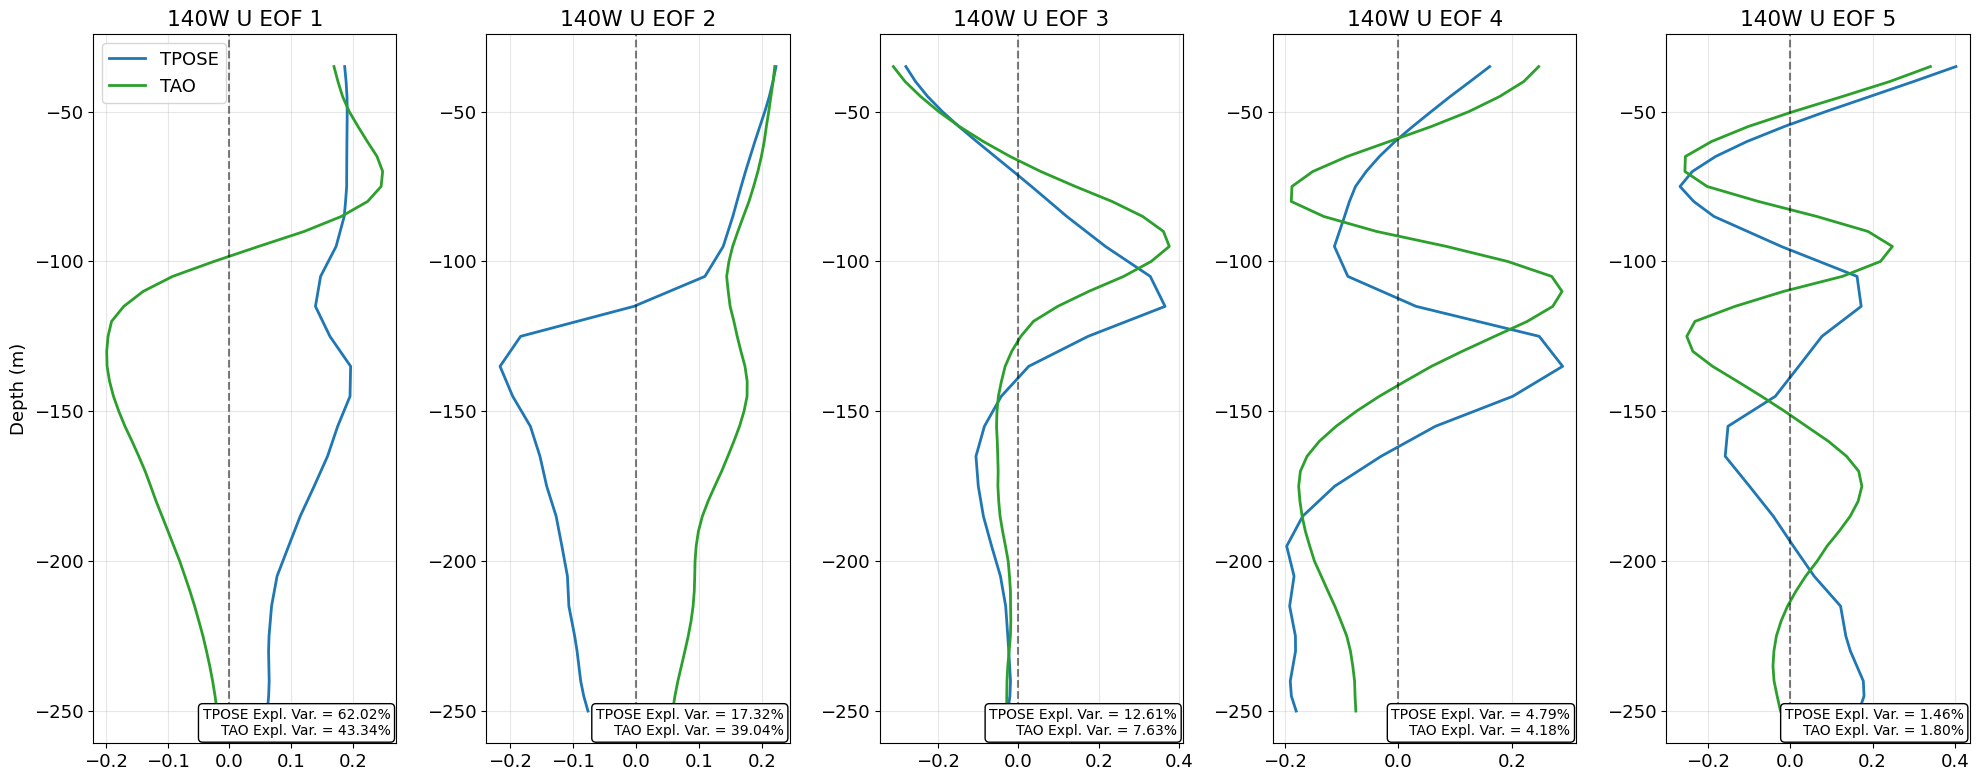

<Figure size 640x480 with 0 Axes>

In [47]:
# Plot the vertical modes from xeofs
fig, axes = plt.subplots(ncols=n_modes, nrows=1, figsize=(n_modes*4, 8))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_U_140.isel(mode=i)
    axes[i].plot(eof_mode.values, U6_140.Z.values, 'tab:blue', linewidth=2, label='TPOSE')
    eof_mode = eofs_xeofs_U_TAO_140.isel(mode=i)
    axes[i].plot(eof_mode.values, U6_TAO_140.Z.values, 'tab:green', linewidth=2, label='TAO')
    # axes[i].plot(eofs_U_140[:, i], U6_140.Z.values, 'b--', linewidth=2, label='Covariance method')
    axes[i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[i].set_title(f'140W U EOF {i+1}')
    axes[i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_U_140[i]*100
    tao_expl_var = explained_variance_xeofs_U_TAO_140[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[i].text(
        0.98, 0.05, textstr,
        transform=axes[i].transAxes,  # axes fraction
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0].set_ylabel('Depth (m)')
axes[0].legend(loc='upper left')
# axes[-1].set_xlabel('EOF Amplitude')
plt.tight_layout()
plt.show()
plt.savefig('vertical_modes_U_140.png',format='png')

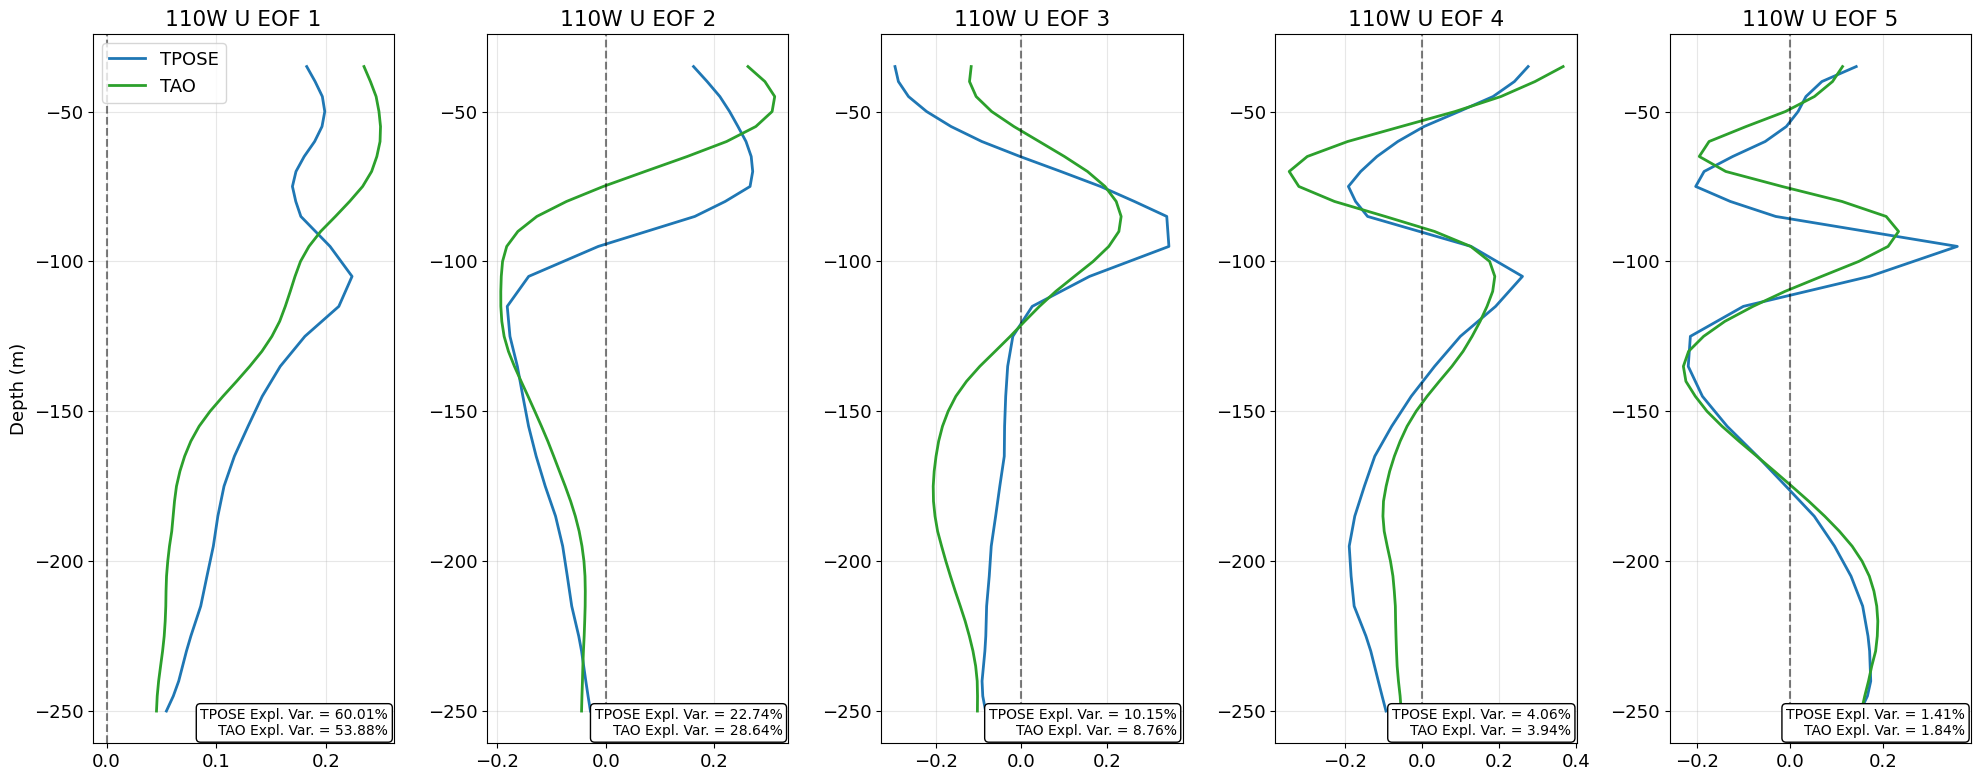

<Figure size 640x480 with 0 Axes>

In [41]:
# Plot the vertical modes from xeofs
fig, axes = plt.subplots(ncols=n_modes, nrows=1, figsize=(n_modes*4, 8))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_U_110.isel(mode=i)
    axes[i].plot(eof_mode.values, U6_110.Z.values, 'tab:blue', linewidth=2, label='TPOSE')
    eof_mode = eofs_xeofs_U_TAO_110.isel(mode=i)
    axes[i].plot(eof_mode.values, U6_TAO_110.Z.values, 'tab:green', linewidth=2, label='TAO')
    # axes[i].plot(eofs_U_140[:, i], U6_140.Z.values, 'b--', linewidth=2, label='Covariance method')
    axes[i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[i].set_title(f'110W U EOF {i+1}')
    axes[i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_U_110[i]*100
    tao_expl_var = explained_variance_xeofs_U_TAO_110[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[i].text(
        0.98, 0.05, textstr,
        transform=axes[i].transAxes,  # axes fraction
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0].set_ylabel('Depth (m)')
axes[0].legend(loc='upper left')
# axes[-1].set_xlabel('EOF Amplitude')
plt.tight_layout()
plt.show()
plt.savefig('vertical_modes_U_110.png',format='png')

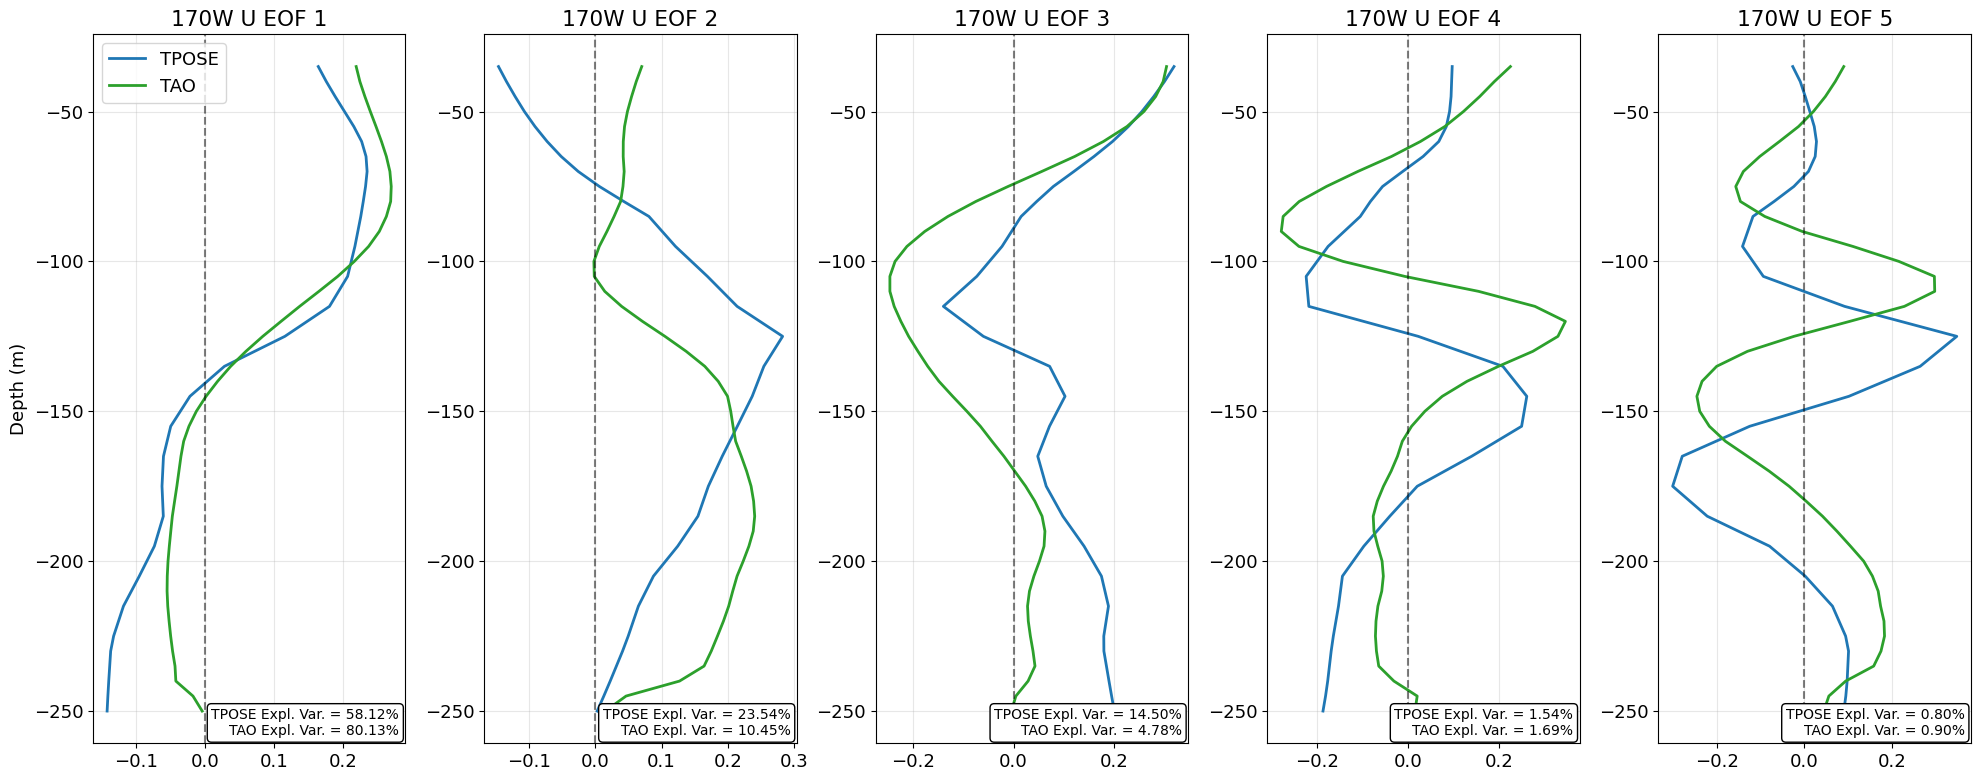

<Figure size 640x480 with 0 Axes>

In [42]:
# Plot the vertical modes from xeofs
fig, axes = plt.subplots(ncols=n_modes, nrows=1, figsize=(n_modes*4, 8))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_U_170.isel(mode=i)
    axes[i].plot(eof_mode.values, U6_170.Z.values, 'tab:blue', linewidth=2, label='TPOSE')
    eof_mode = eofs_xeofs_U_TAO_170.isel(mode=i)
    axes[i].plot(eof_mode.values, U6_TAO_170.Z.values, 'tab:green', linewidth=2, label='TAO')
    # axes[i].plot(eofs_U_140[:, i], U6_140.Z.values, 'b--', linewidth=2, label='Covariance method')
    axes[i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[i].set_title(f'170W U EOF {i+1}')
    axes[i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_U_170[i]*100
    tao_expl_var = explained_variance_xeofs_U_TAO_170[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[i].text(
        0.98, 0.05, textstr,
        transform=axes[i].transAxes,  # axes fraction
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0].set_ylabel('Depth (m)')
axes[0].legend(loc='upper left')
# axes[-1].set_xlabel('EOF Amplitude')
plt.tight_layout()
plt.show()
plt.savefig('vertical_modes_U_170.png',format='png')

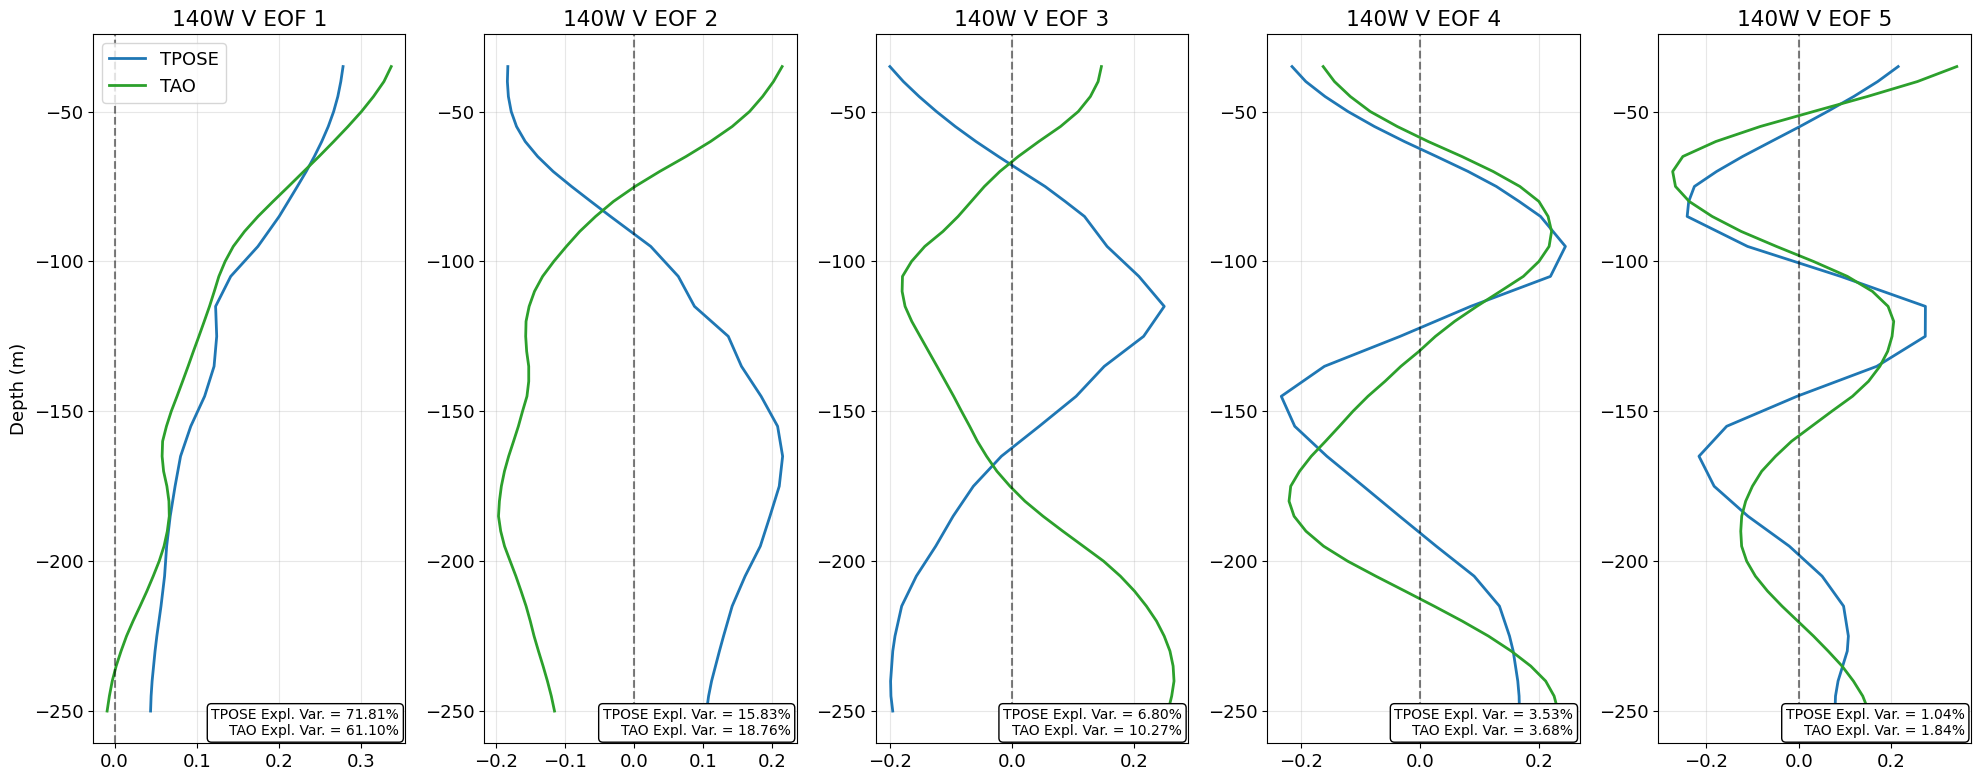

<Figure size 640x480 with 0 Axes>

In [44]:
# Plot the vertical modes from xeofs
fig, axes = plt.subplots(ncols=n_modes, nrows=1, figsize=(n_modes*4, 8))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_V_140.isel(mode=i)
    axes[i].plot(eof_mode.values, V6_140.Z.values, 'tab:blue', linewidth=2, label='TPOSE')
    eof_mode = eofs_xeofs_V_TAO_140.isel(mode=i)
    axes[i].plot(eof_mode.values, V6_TAO_140.Z.values, 'tab:green', linewidth=2, label='TAO')
    # axes[i].plot(eofs_U_140[:, i], U6_140.Z.values, 'b--', linewidth=2, label='Covariance method')
    axes[i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[i].set_title(f'140W V EOF {i+1}')
    axes[i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_V_140[i]*100
    tao_expl_var = explained_variance_xeofs_V_TAO_140[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[i].text(
        0.98, 0.05, textstr,
        transform=axes[i].transAxes,  # axes fraction
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0].set_ylabel('Depth (m)')
axes[0].legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('vertical_modes_V_140.png',format='png')

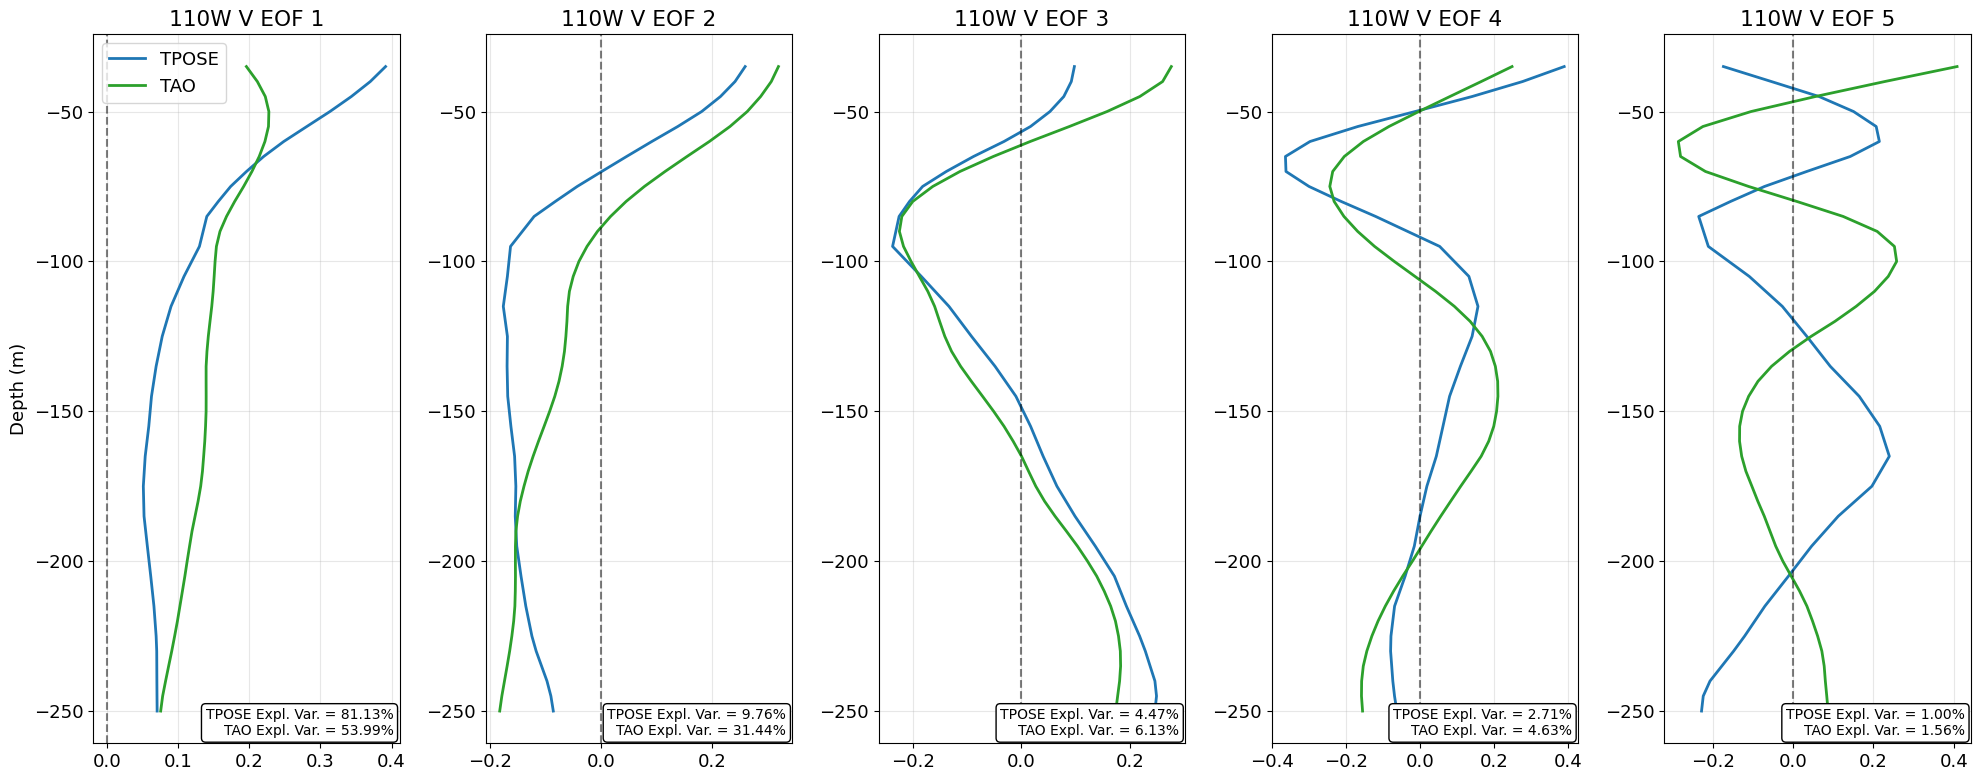

<Figure size 640x480 with 0 Axes>

In [46]:
# Plot the vertical modes from xeofs
fig, axes = plt.subplots(ncols=n_modes, nrows=1, figsize=(n_modes*4, 8))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_V_110.isel(mode=i)
    axes[i].plot(eof_mode.values, V6_110.Z.values, 'tab:blue', linewidth=2, label='TPOSE')
    eof_mode = eofs_xeofs_V_TAO_110.isel(mode=i)
    axes[i].plot(eof_mode.values, V6_TAO_110.Z.values, 'tab:green', linewidth=2, label='TAO')
    # axes[i].plot(eofs_U_140[:, i], U6_140.Z.values, 'b--', linewidth=2, label='Covariance method')
    axes[i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[i].set_title(f'110W V EOF {i+1}')
    axes[i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_V_110[i]*100
    tao_expl_var = explained_variance_xeofs_V_TAO_110[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[i].text(
        0.98, 0.05, textstr,
        transform=axes[i].transAxes,  # axes fraction
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0].set_ylabel('Depth (m)')
axes[0].legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('vertical_modes_V_110.png',format='png')

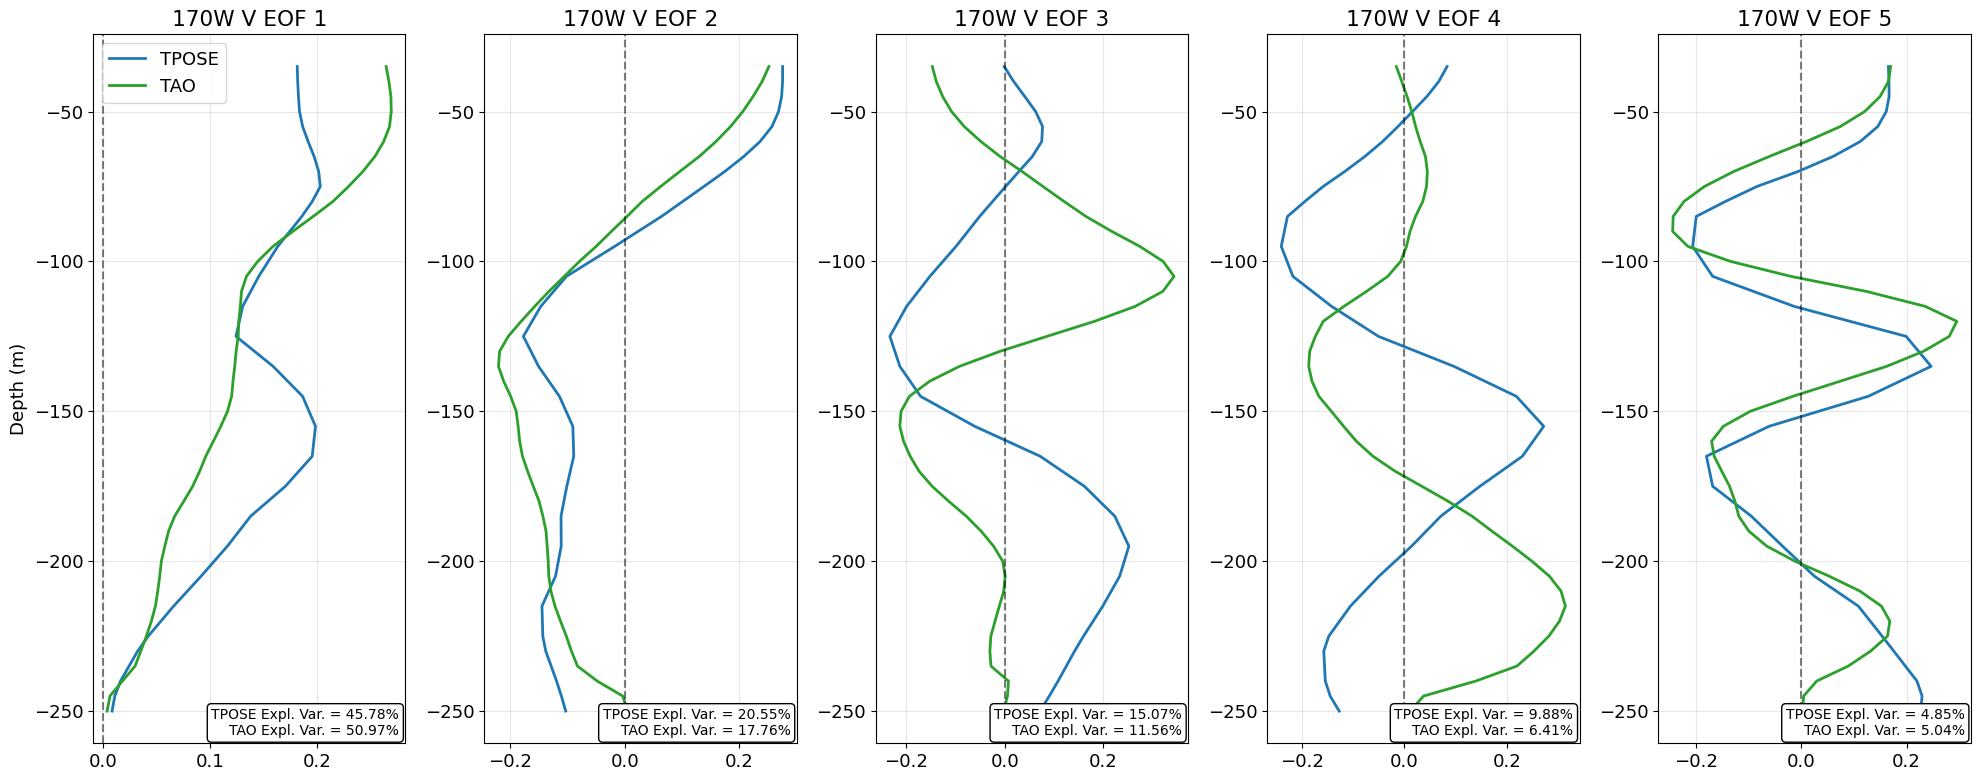

<Figure size 640x480 with 0 Axes>

In [48]:
# Plot the vertical modes from xeofs
fig, axes = plt.subplots(ncols=n_modes, nrows=1, figsize=(n_modes*4, 8))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_V_170.isel(mode=i)
    axes[i].plot(eof_mode.values, V6_170.Z.values, 'tab:blue', linewidth=2, label='TPOSE')
    eof_mode = eofs_xeofs_V_TAO_170.isel(mode=i)
    axes[i].plot(eof_mode.values, V6_TAO_170.Z.values, 'tab:green', linewidth=2, label='TAO')
    # axes[i].plot(eofs_U_140[:, i], U6_140.Z.values, 'b--', linewidth=2, label='Covariance method')
    axes[i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[i].set_title(f'170W V EOF {i+1}')
    axes[i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_V_170[i]*100
    tao_expl_var = explained_variance_xeofs_V_TAO_170[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[i].text(
        0.98, 0.05, textstr,
        transform=axes[i].transAxes,  # axes fraction
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0].set_ylabel('Depth (m)')
axes[0].legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('vertical_modes_V_170.png',format='png')

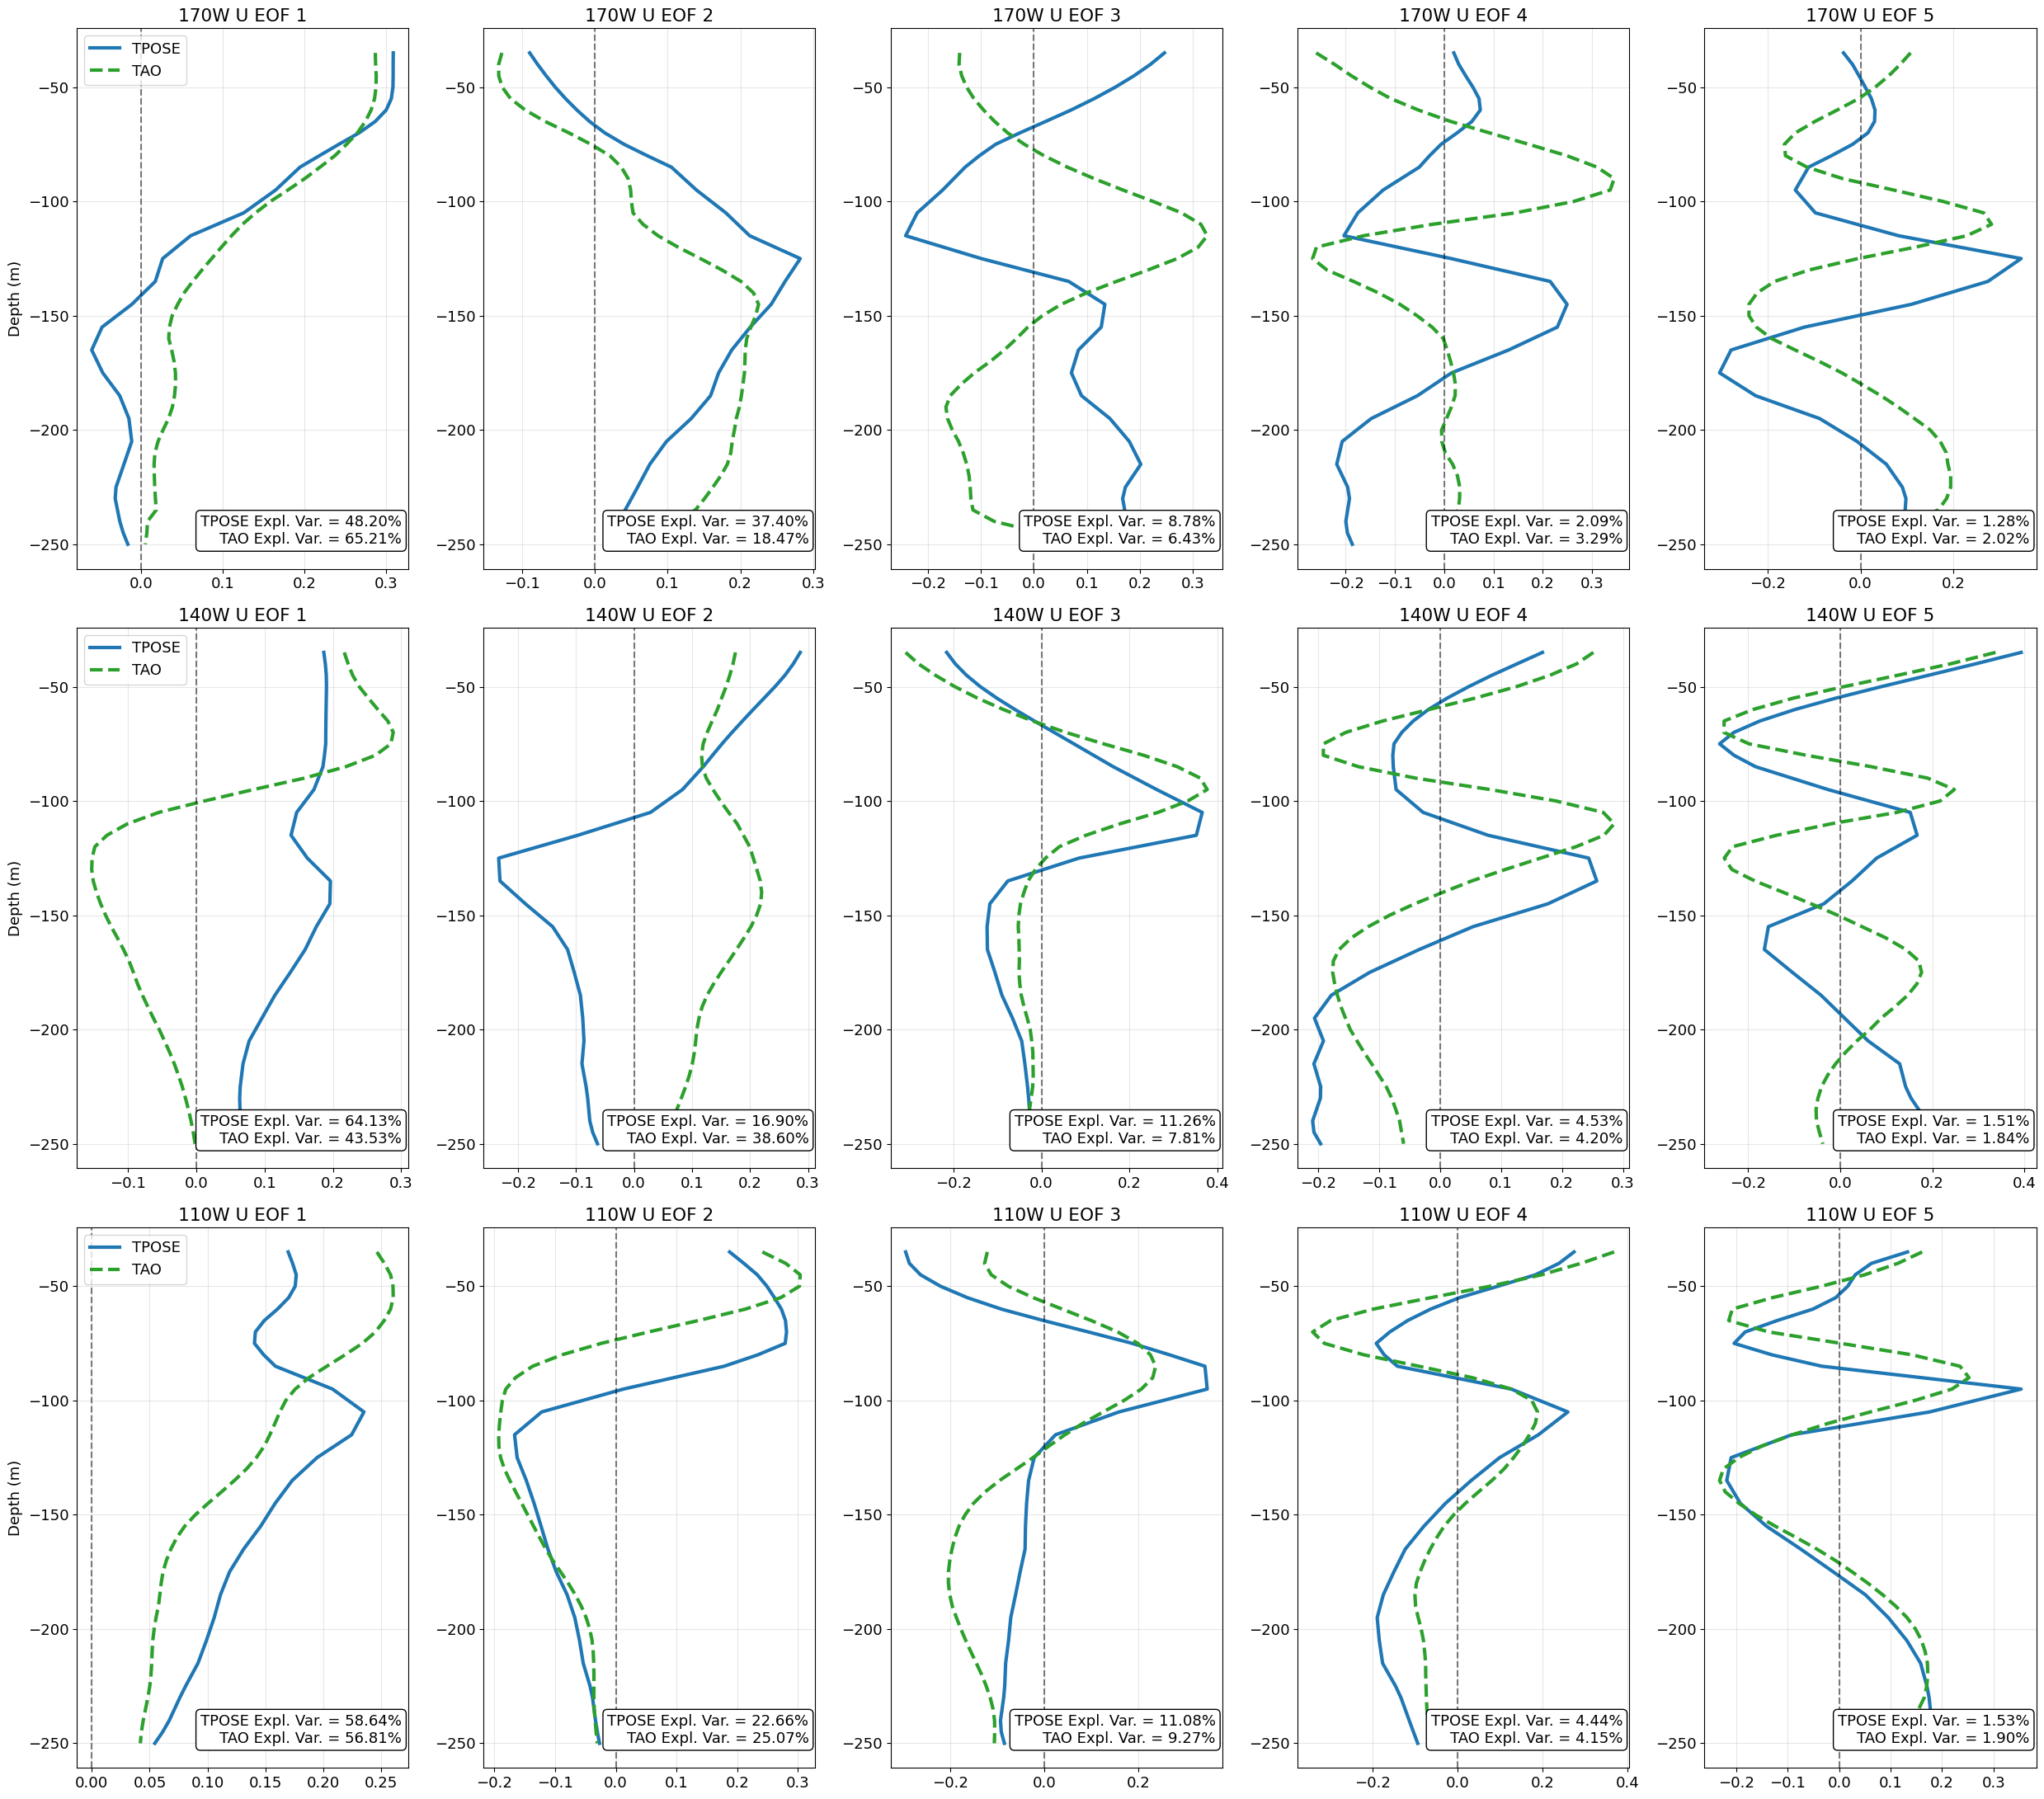

In [60]:
# generate one figure with all vertical modes for U velocity (three rows, one for each longitude    )
fig, axes = plt.subplots(ncols=n_modes, nrows=3, figsize=(n_modes*5, 22))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_U_170.isel(mode=i)
    axes[0,i].plot(eof_mode.values, U6_170.Z.values, 'tab:blue', linewidth=3, label='TPOSE')
    eof_mode = eofs_xeofs_U_TAO_170.isel(mode=i)
    axes[0,i].plot(eof_mode.values, U6_TAO_170.Z.values, 'tab:green', linestyle='--', linewidth=3, label='TAO')
    axes[0,i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[0,i].set_title(f'170W U EOF {i+1}')
    axes[0,i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_U_170[i]*100
    tao_expl_var = explained_variance_xeofs_U_TAO_170[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[0,i].text(
        0.98, 0.1, textstr,
        transform=axes[0,i].transAxes,  # axes fraction
        fontsize=13,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

    eof_mode = eofs_xeofs_U_140.isel(mode=i)
    axes[1,i].plot(eof_mode.values, U6_140.Z.values, 'tab:blue', linewidth=3, label='TPOSE')
    eof_mode = eofs_xeofs_U_TAO_140.isel(mode=i)
    axes[1,i].plot(eof_mode.values, U6_TAO_140.Z.values, 'tab:green', linestyle='--', linewidth=3, label='TAO')
    axes[1,i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[1,i].set_title(f'140W U EOF {i+1}')
    axes[1,i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_U_140[i]*100
    tao_expl_var = explained_variance_xeofs_U_TAO_140[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[1,i].text(
        0.98, 0.1, textstr,
        transform=axes[1,i].transAxes,  # axes fraction
        fontsize=13,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

    eof_mode = eofs_xeofs_U_110.isel(mode=i)
    axes[2,i].plot(eof_mode.values, U6_110.Z.values, 'tab:blue', linewidth=3, label='TPOSE')
    eof_mode = eofs_xeofs_U_TAO_110.isel(mode=i)
    axes[2,i].plot(eof_mode.values, U6_TAO_110.Z.values, 'tab:green', linestyle='--', linewidth=3, label='TAO')
    axes[2,i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[2,i].set_title(f'110W U EOF {i+1}')
    axes[2,i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_U_110[i]*100
    tao_expl_var = explained_variance_xeofs_U_TAO_110[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[2,i].text(
        0.98, 0.1, textstr,
        transform=axes[2,i].transAxes,  # axes fraction
        fontsize=13,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')
axes[0,0].legend(loc='upper left')
axes[1,0].legend(loc='upper left')
axes[2,0].legend(loc='upper left')
plt.tight_layout()
plt.savefig('vertical_modes_U_detrend.png',format='png')

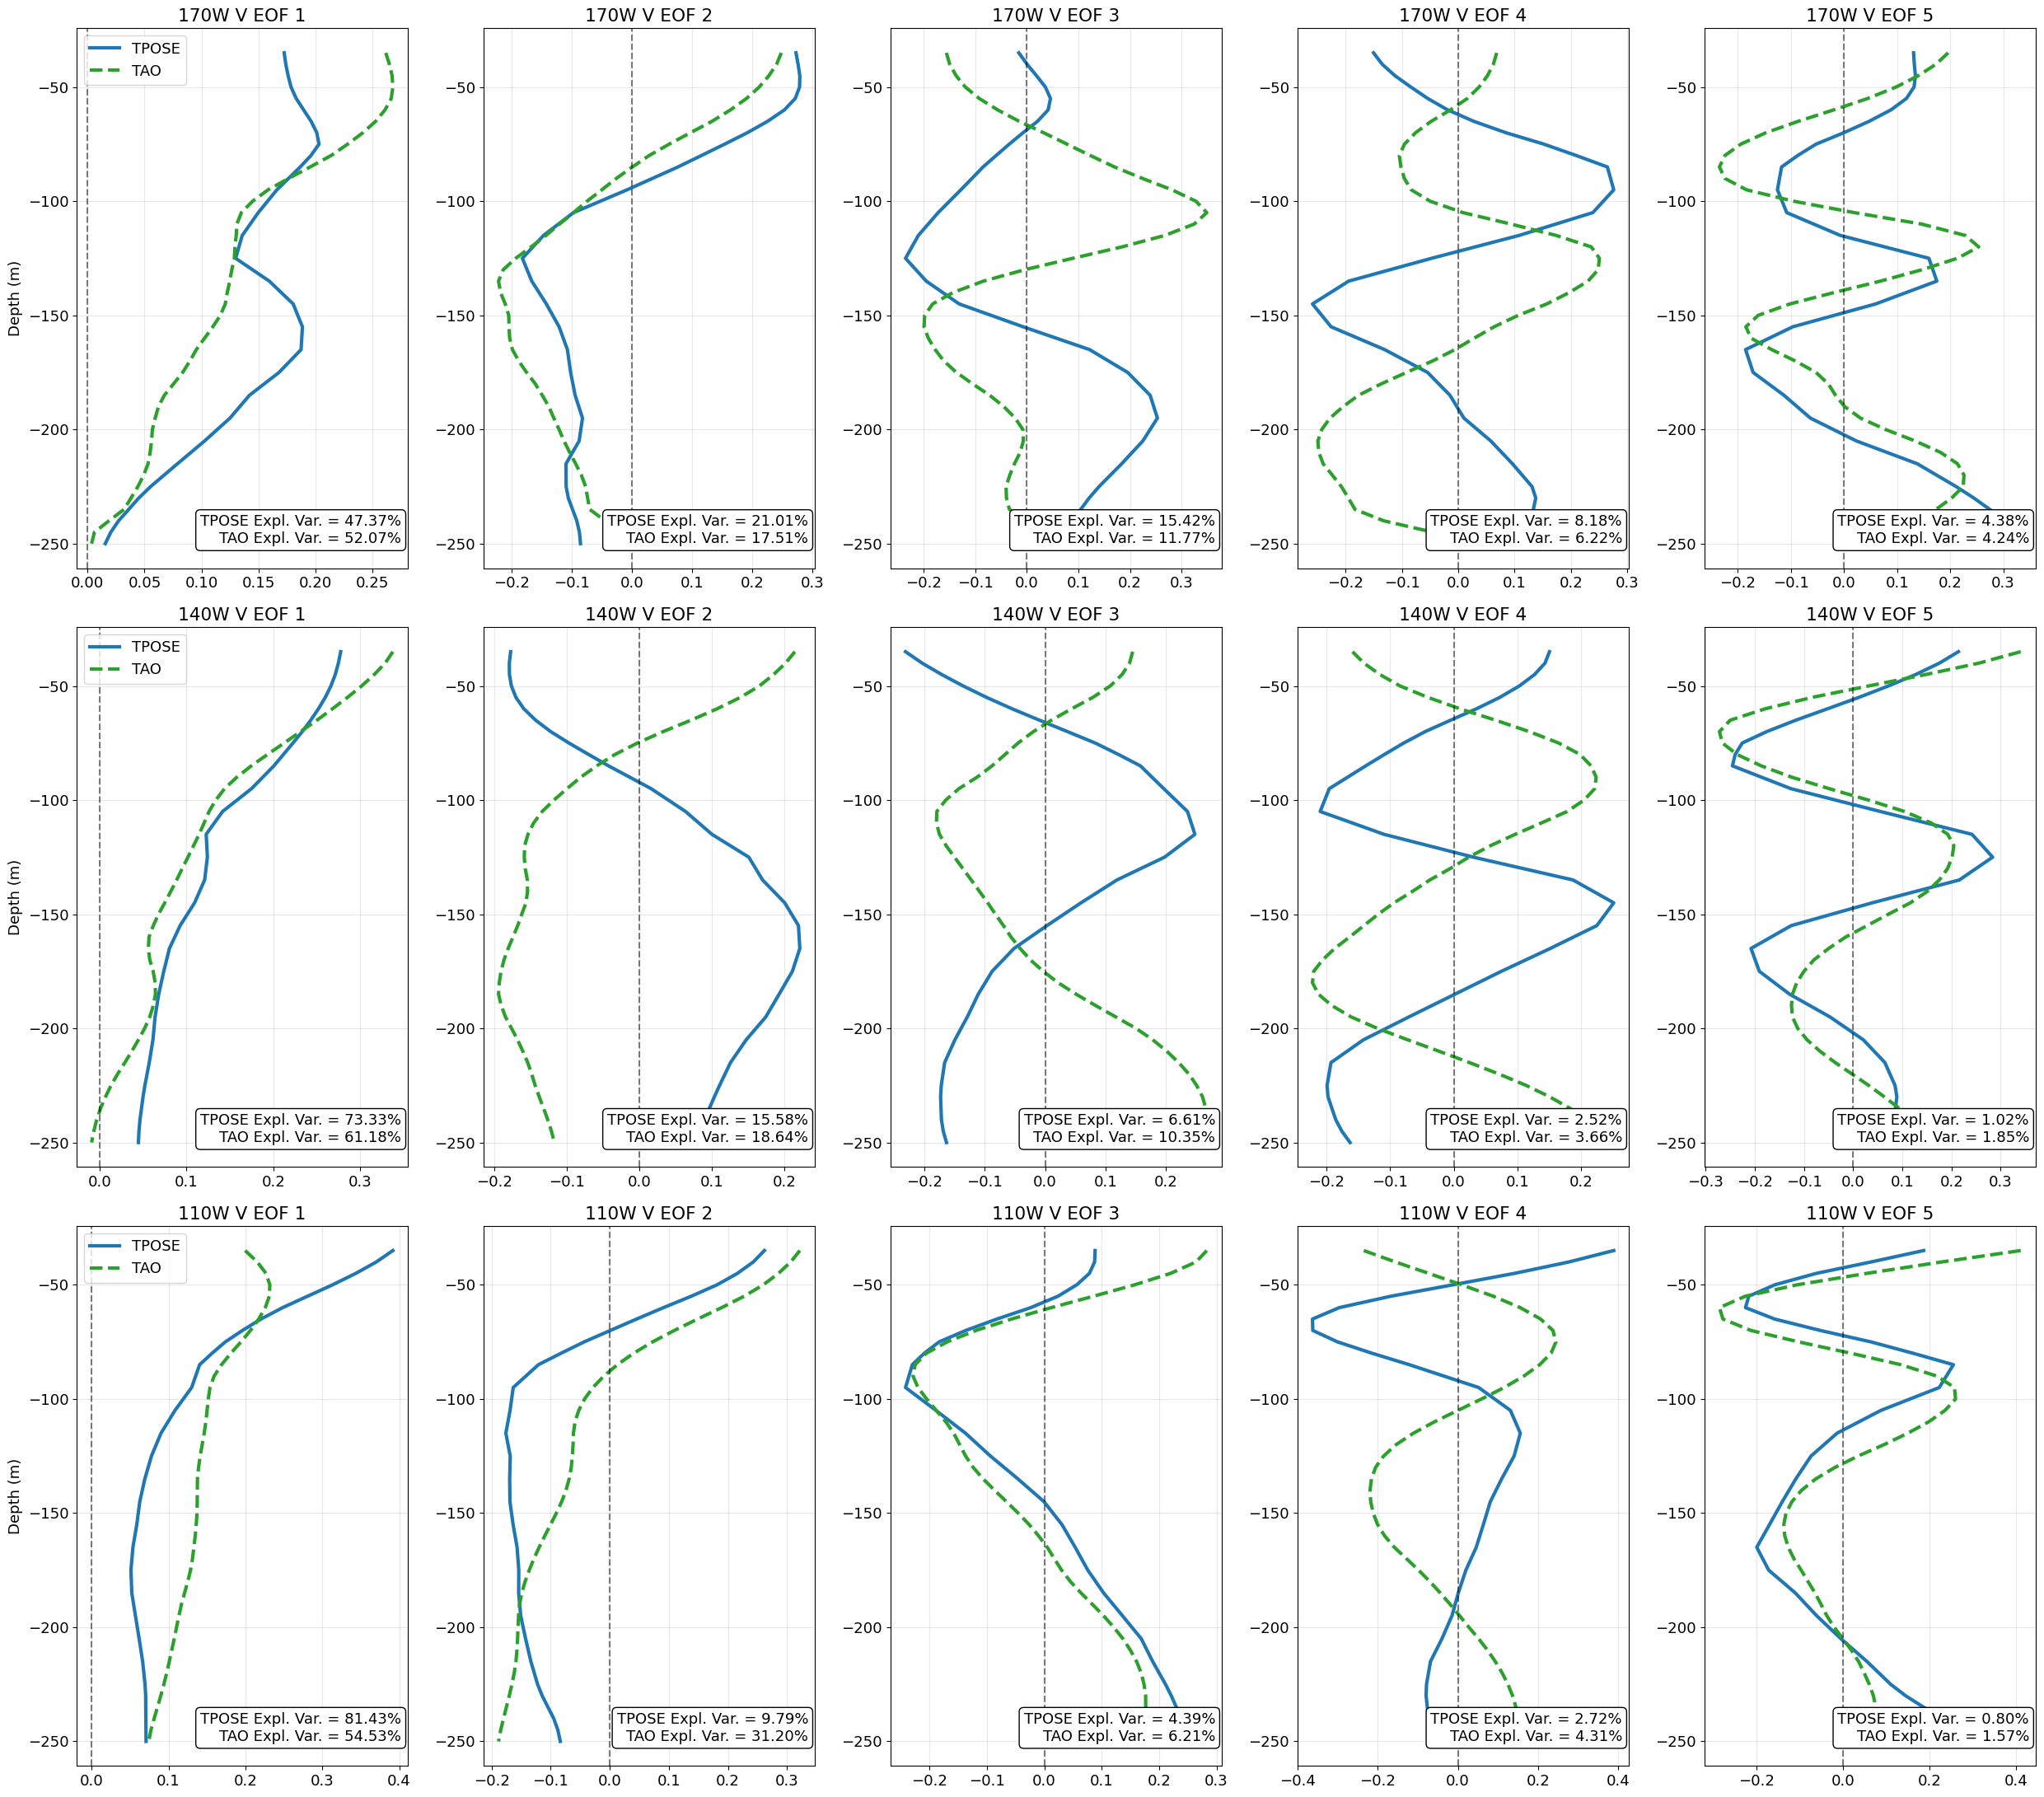

In [61]:
# generate one figure with all vertical modes for U velocity (three rows, one for each longitude    )
fig, axes = plt.subplots(ncols=n_modes, nrows=3, figsize=(n_modes*5, 22))

for i in range(n_modes):
    # xeofs EOFs are in (mode, space) format, so we transpose
    eof_mode = eofs_xeofs_V_170.isel(mode=i)
    axes[0,i].plot(eof_mode.values, V6_170.Z.values, 'tab:blue', linewidth=3, label='TPOSE')
    eof_mode = eofs_xeofs_V_TAO_170.isel(mode=i)
    axes[0,i].plot(eof_mode.values, V6_TAO_170.Z.values, 'tab:green', linestyle='--', linewidth=3, label='TAO')
    axes[0,i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[0,i].set_title(f'170W V EOF {i+1}')
    axes[0,i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_V_170[i]*100
    tao_expl_var = explained_variance_xeofs_V_TAO_170[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[0,i].text(
        0.98, 0.1, textstr,
        transform=axes[0,i].transAxes,  # axes fraction
        fontsize=13,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

    eof_mode = eofs_xeofs_V_140.isel(mode=i)
    axes[1,i].plot(eof_mode.values, V6_140.Z.values, 'tab:blue', linewidth=3, label='TPOSE')
    eof_mode = eofs_xeofs_V_TAO_140.isel(mode=i)
    axes[1,i].plot(eof_mode.values, V6_TAO_140.Z.values, 'tab:green', linestyle='--', linewidth=3, label='TAO')
    axes[1,i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[1,i].set_title(f'140W V EOF {i+1}')
    axes[1,i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_V_140[i]*100
    tao_expl_var = explained_variance_xeofs_V_TAO_140[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[1,i].text(
        0.98, 0.1, textstr,
        transform=axes[1,i].transAxes,  # axes fraction
        fontsize=13,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

    eof_mode = eofs_xeofs_V_110.isel(mode=i)
    axes[2,i].plot(eof_mode.values, V6_110.Z.values, 'tab:blue', linewidth=3, label='TPOSE')
    eof_mode = eofs_xeofs_V_TAO_110.isel(mode=i)
    axes[2,i].plot(eof_mode.values, V6_TAO_110.Z.values, 'tab:green', linestyle='--', linewidth=3, label='TAO')
    axes[2,i].axvline(x=0, color='k', linestyle='--', alpha=0.5)
    axes[2,i].set_title(f'110W V EOF {i+1}')
    axes[2,i].grid(True, alpha=0.3)

    tpose_expl_var = explained_variance_xeofs_V_110[i]*100
    tao_expl_var = explained_variance_xeofs_V_TAO_110[i]*100
    textstr = f"TPOSE Expl. Var. = {tpose_expl_var:.2f}%\nTAO Expl. Var. = {tao_expl_var:.2f}%"

    # Add text box
    axes[2,i].text(
        0.98, 0.1, textstr,
        transform=axes[2,i].transAxes,  # axes fraction
        fontsize=13,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.0)
    )

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')
axes[0,0].legend(loc='upper left')
axes[1,0].legend(loc='upper left')
axes[2,0].legend(loc='upper left')
plt.tight_layout()
plt.savefig('vertical_modes_V_detrend.png',format='png')

## Plotting

In [ ]:
# plot with imshow
def plot_covariance(cov_matrix, title, ax):
    im = ax.pcolormesh(U6_110.Z, U6_110.Z, cov_matrix, cmap='coolwarm', vmin=-0.05, vmax=0.05)
    # cbar = fig.colorbar(im, ax=ax, label='$m^2/s^2$')
    ax.set_title(title)
    ax.set_xlabel('Z (m)')
    ax.set_ylabel('Z (m)')
    plt.colorbar(im, ax=ax)
fig, axs = plt.subplots(2, 2, figsize=(11, 9))
plot_covariance(cov_depth_U_140, 'Cov U 140W', axs[0, 0])
plot_covariance(cov_depth_U_TAO_140, 'Cov U TAO 140W', axs[1, 0])
plot_covariance(cov_depth_V_140, 'Cov V 140W', axs[0, 1])
plot_covariance(cov_depth_V_TAO_140, 'Cov V TAO 140W', axs[1, 1])
plt.tight_layout()
plt.savefig('depthdepth_cov_UV_140W.png')

In [ ]:
# plot with imshow
def plot_corr(cov_matrix, title, ax):
    im = ax.pcolormesh(U6_110.Z, U6_110.Z, cov_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_title(title)
    ax.set_xlabel('Z (m)')
    ax.set_ylabel('Z (m)')
    plt.colorbar(im, ax=ax)
fig, axs = plt.subplots(2, 2, figsize=(11, 9))
plot_corr(corr_depth_U_140, 'Corr U 140W', axs[0, 0])
plot_corr(corr_depth_U_TAO_140, 'Corr U TAO 140W', axs[1, 0])
plot_corr(corr_depth_V_140, 'Corr V 140W', axs[0, 1])
plot_corr(corr_depth_V_TAO_140, 'Corr V TAO 140W', axs[1, 1])
plt.tight_layout()
plt.savefig('depthdepth_corr_UV_140W.png')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(11, 9))
plot_covariance(cov_depth_U_110, 'Cov U 110W', axs[0, 0])
plot_covariance(cov_depth_U_TAO_110, 'Cov U TAO 110W', axs[1, 0])
plot_covariance(cov_depth_V_110, 'Cov V 110W', axs[0, 1])
plot_covariance(cov_depth_V_TAO_110, 'Cov V TAO 110W', axs[1, 1])
plt.tight_layout()
plt.savefig('depthdepth_cov_UV_110W.png')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(11, 9))
plot_corr(corr_depth_U_110, 'Corr U 110W', axs[0, 0])
plot_corr(corr_depth_U_TAO_110, 'Corr U TAO 110W', axs[1, 0])
plot_corr(corr_depth_V_110, 'Corr V 110W', axs[0, 1])
plot_corr(corr_depth_V_TAO_110, 'Corr V TAO 110W', axs[1, 1])
plt.tight_layout()
plt.savefig('depthdepth_corr_UV_110W.png')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(11, 9))
plot_covariance(cov_depth_U_170, 'Cov U 170W', axs[0, 0])
plot_covariance(cov_depth_U_TAO_170, 'Cov U TAO 170W', axs[1, 0])
plot_covariance(cov_depth_V_170, 'Cov V 170W', axs[0, 1])
plot_covariance(cov_depth_V_TAO_170, 'Cov V TAO 170W', axs[1, 1])
plt.tight_layout()
plt.savefig('depthdepth_cov_UV_170W.png')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(11, 9))
plot_corr(corr_depth_U_170, 'Corr U 170W', axs[0, 0])
plot_corr(corr_depth_U_TAO_170, 'Corr U TAO 170W', axs[1, 0])
plot_corr(corr_depth_V_170, 'Corr V 170W', axs[0, 1])
plot_corr(corr_depth_V_TAO_170, 'Corr V TAO 170W', axs[1, 1])
plt.tight_layout()
plt.savefig('depthdepth_corr_UV_170W.png')

In [3]:
client.shutdown()